<a href="https://colab.research.google.com/github/KrisMatrix/TensorFlow_Certification_Prep/blob/main/02_neural_network_classification_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write NN for classification problems.

A classification is where you try to classify something as strictly one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit 

In [1]:
from sklearn.datasets import make_circles
#Make a large circle containing a smaller circle in 2d.

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
# Check out features

X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

Based on the label data, we can infer that this will be a binary classification problem

Our data is a little hard to understand right now...let's visualize it.

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1": X[:,1], "label": y})   
#Above line says show data in tabular form. The table will show
# X0, X1 and y, where X0 means all rows in matrix X but column 0
# and similarly the case for X1.
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


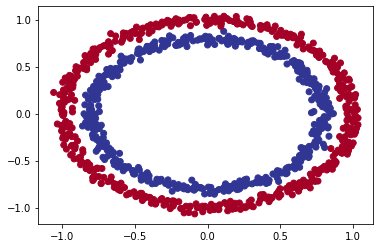

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [9]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [10]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modelling with TensorFlow are typically:
1. Create or import a model.
2. Compile the model.
3. Fit the model.
4. Evaluate the model.
5. Tweak and re-evaluate... .

In [11]:
import tensorflow as tf
tf.__version__
# Set the random seed
tf.random.set_seed(42)

In [12]:
#1. Create the model using the sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1) 
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#Note accuracy will show in decimals for percentage. I.e. 50% is 0.5000

#3. Fit the model
model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 998us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [13]:
#Let's try and improve our model by training
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy, it is as though it is just guessing.

So let's step things up a notch and add layers.

In [14]:
#1. Create the model using the sequential API
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) 
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#Note accuracy will show in decimals for percentage. I.e. 50% is 0.5000

#3. Fit the model
model_2.fit(X,y, epochs=100, verbose=0)

In [15]:
#4. evaluate the model
model_2.evaluate(X, y)

#We find the the accuracy is still bad.

32/32 [==============================] - 0s 930us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934733390808105, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might add more layers, or increase the no. of hidden units within a layer.
2. Compiling a model - we might choose a different optimization function such as Adam or SGD.
3. Fitting a model - we might change epochs

In [16]:
#Set the random seed
tf.random.set_seed(42)

In [17]:
#1. Create the model(this time with 3 layers)
model_3 = tf.keras.Sequential([ #more layers
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                      
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),   #different optimizers
                metrics=["accuracy"])

#3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [18]:
#4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254054069519, 0.5080000162124634]

We find the the despite the change in model 3, we still get ~50% accuracy.

In [19]:
model_2.summary() #

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


# To visualize our model's predictions, let's create a function `plot_decision_boundary`, this function will:

* Take in a trained model, features(X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [20]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  #Definte the axis boundaries of the plot and create a meshgrid.
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  #Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]  #stack 2D arrays together
  #ravel() flattens that array essentially a 1D array
  #np.c stacks to 1D arrays left to right

  #Make predictions
  y_pred = model.predict(x_in)

  #Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classifications")
    #We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [21]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

doing binary classification


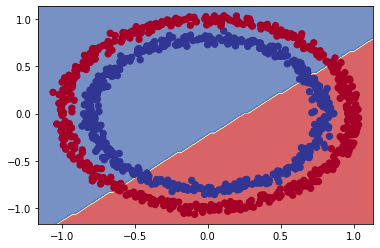

In [22]:
#Check out the prediction our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [23]:
## Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

##Create some regression data
X_regression = tf.range(0, 1000, 5)       #Just a x-axis range with steps of 5
y_regression = tf.range(100, 1100, 5) #y = x + 100  #y is adjusted because y will always be 10 greater than x

##Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

##Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

Oh wait...we compiled our model for a binary classification problem.

But..we're now working on a regression problem, let's change the model to suit our data.

In [24]:
##1. Create the model(this time with 3 layers)
#model_3 = tf.keras.Sequential([ #more layers
#  tf.keras.layers.Dense(100),
#  tf.keras.layers.Dense(10),
#  tf.keras.layers.Dense(1)                                      
#])

##2. Compile the model
#model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#                optimizer=tf.keras.optimizers.Adam(),   #different optimizers
#                metrics=["accuracy"])

##3. Fit the model
#model_3.fit(X, y, epochs=100, verbose=0)

#Set up random seed
tf.random.set_seed(42)

#1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) 
])

#2.Compile the model (only change is the loss function)
model_3.compile(loss=tf.keras.losses.mae, #mean abs error
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#Apparently binary classification is done with BinaryCrossEntropy() and MAE does
# regression.

#3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s

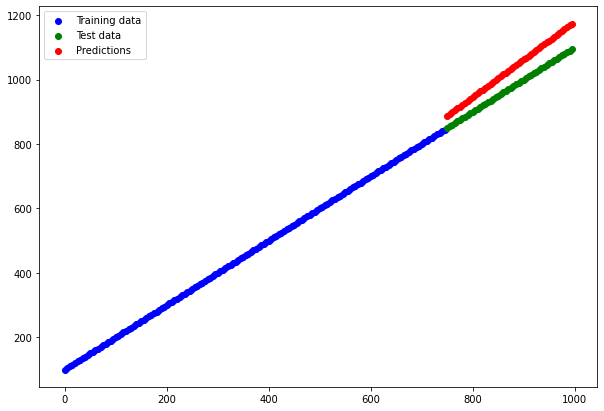

In [25]:
#Make predictions with our trained model
y_reg_pred = model_3.predict(X_reg_test)

#Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_pred, c="r", label="Predictions")
plt.legend();

### The missing piece: Non-Linearity

In [26]:
#Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)                               
])

#2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. Fit the model
history = model_4.fit(X,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 960us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 1

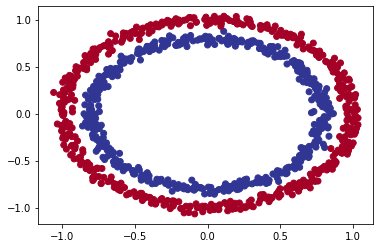

In [27]:
#Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

doing binary classification


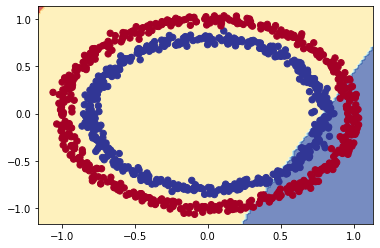

In [28]:
#Check the decision boundary for our model
plot_decision_boundary(model_4,X=X,y=y)

Let's try build our first NN with a non-linear activation.

In [29]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu) 
])

#Observe that we are using the non-linear activation ReLU

#2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. Fit the model
history = model_5.fit(X,y, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

In [30]:
#Time to replicate the multi-layer NN from TF playground in code

#Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1)
])

#2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. Fit the model
#history = model_6.fit(X,y, epochs=100)  #Accuracy is bad
#history = model_6.fit(X,y, epochs=2000)  #commented out because it takes too long to run.
history = model_6.fit(X,y, epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


32/32 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/200
32/32 [=

In [31]:
#Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


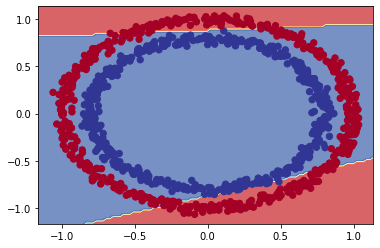

In [32]:
#Check the decision boundary for our model
plot_decision_boundary(model_6,X=X,y=y)

In [33]:
#Time to replicate the multi-layer NN from TF playground in code

#Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. Fit the model
history = model_7.fit(X,y, epochs=250)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [34]:
#Evaluate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 920us/step - loss: 0.0459 - accuracy: 0.9920


[0.04593365266919136, 0.9919999837875366]

doing binary classification


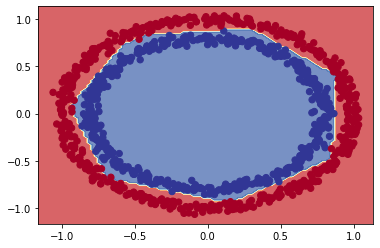

In [35]:
#Check the decision boundary for our model
plot_decision_boundary(model_7,X=X,y=y)

In [36]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

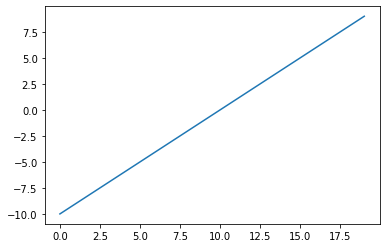

In [37]:
# Visualize our toy tensor
plt.plot(A)

In [38]:
# Let's start by replicating sigmoid - sigmoid(x) = 1/ (1 + exp(-x))
def sigmoid(x):
  return 1/(1 + tf.exp(-x))

#Use the sigmoid func on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

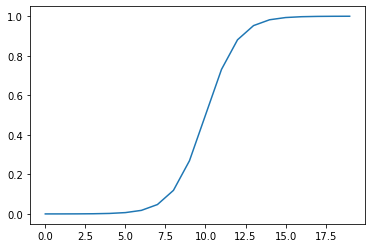

In [39]:
plt.plot(sigmoid(A))

Intuition: The sigmoid function make it so that ML can build using some curves instead of straight lines.

In [40]:
#Let's create the ReLu function
def relu(x):
  return tf.maximum(0,x)

#Pass our toy tensor to our custom relu function
relu(A) #Turns negative numbers to zero. Otherwise give me the number itself.

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

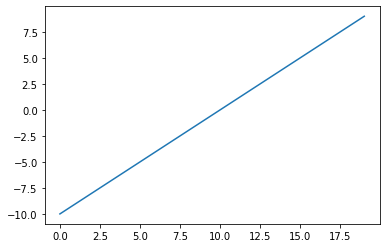

In [41]:
plt.plot(A)

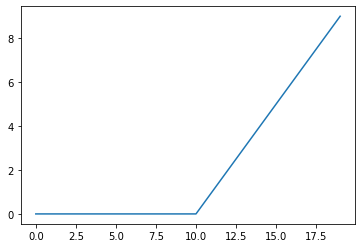

In [42]:
plt.plot(relu(A))

In [43]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

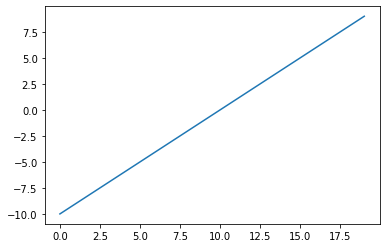

In [44]:
plt.plot(tf.keras.activations.linear(A))    #Basically, this shows that linear activation function changes nothing.

In [45]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Evaluating and Improving our classification

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training dataset.

In [46]:
#Check how many exampes are there.
len(X)

1000

In [47]:
#Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [48]:
#Let's recreate a model to fit on the training data and evaluate on the testing data.

#Set random seed
tf.random.set_seed(42)

#1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

#2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

In [49]:
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [50]:
#3. Fit the model
history = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [51]:
#4. evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)  #Wow 100% accuracy

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classification
doing binary classification


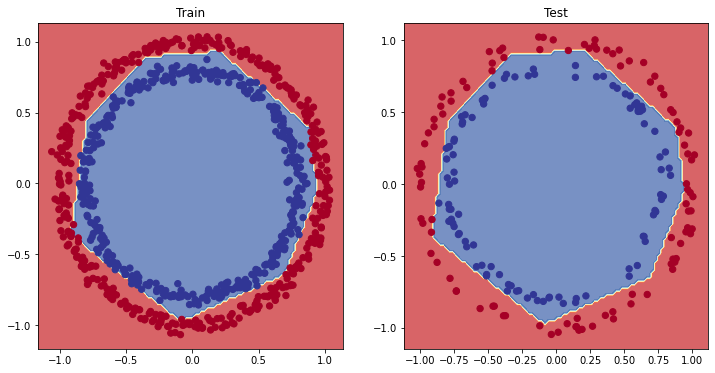

In [52]:
#Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
#Subplot at first seems confusing, but all you are really doing with nrows and ncols,
# which are the first two arguments, is that you are saying, that in a single plot,
# there will be subplots. And how to organize the plot layout is based on  nrows and ncols.
# By saying nrows=1 and ncols=2, we are saying that in a given row, there will be
# two plots. The third argument just says which plot location to place the plot.
plt.subplot(1,2,1)  #one row, two columns, plot 1
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)  #one row, two columns, plot 2
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show()

# PLot the loss (or training) curves

In [53]:
history.history

{'accuracy': [0.5425000190734863,
  0.5525000095367432,
  0.5512499809265137,
  0.5774999856948853,
  0.5849999785423279,
  0.5837500095367432,
  0.675000011920929,
  0.7012500166893005,
  0.7487499713897705,
  0.7737500071525574,
  0.7649999856948853,
  0.7837499976158142,
  0.7975000143051147,
  0.8450000286102295,
  0.9125000238418579,
  0.9312499761581421,
  0.9487500190734863,
  0.9524999856948853,
  0.956250011920929,
  0.9662500023841858,
  0.9775000214576721,
  0.9737499952316284,
  0.9787499904632568,
  0.9775000214576721,
  0.9762499928474426],
 'loss': [0.6846511960029602,
  0.6777209639549255,
  0.6735944151878357,
  0.6681485772132874,
  0.6632686853408813,
  0.6545671820640564,
  0.6412575244903564,
  0.6264280676841736,
  0.6038310527801514,
  0.5714035630226135,
  0.540442943572998,
  0.5015039443969727,
  0.468331903219223,
  0.4113016128540039,
  0.3625059425830841,
  0.32090437412261963,
  0.2847079932689667,
  0.2597200274467468,
  0.23746906220912933,
  0.213519647

In [54]:
#convert history oject into a dataframe.
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673594,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 loss curves')

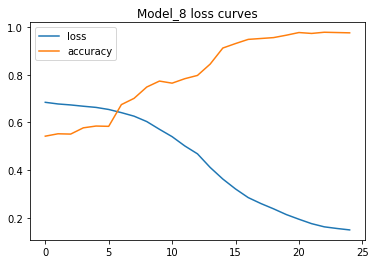

In [55]:
#Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note:** For many problems, the loss func going down means the model is improving (the predictions it's making are getting closer to ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - You can think of a callback as an extra piece of functionality, while it is training.
* Another model (we could use the same one as above, but we're practicing)
* A modified loss curves plot

In [56]:
#Set random seed
tf.random.set_seed(42)

#Create a model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

#Compile
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
#Above line will cause our model to use updated learning rate after each epoch

#Fit  the model

history_9 = model_9.fit(X_train, y_train,  epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

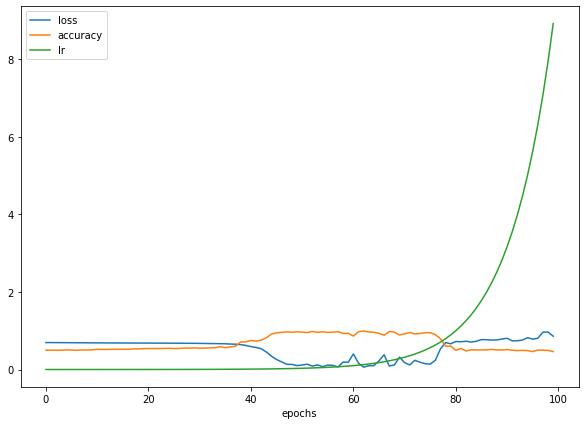

In [57]:
#Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs");

We observer that after a while, the learning rate increases like crazy, but the losess and accuracy don't improve.

In [58]:
#Plot the lr versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning rate vs. Loss')

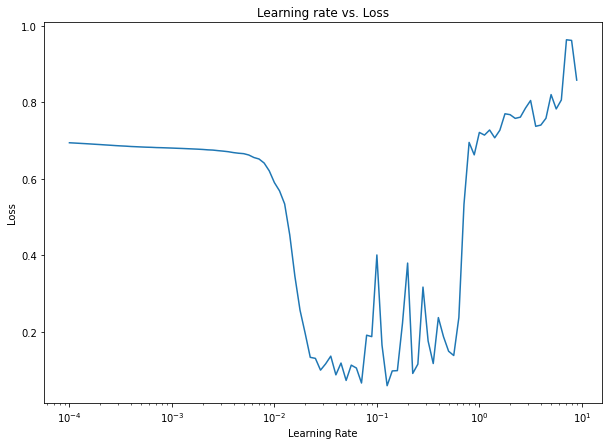

In [59]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

A rule of thumb is pick a lr where the loss is still decreasing but is not flat and jumping. In this case close to 2*10^-2

In [60]:
#Example of other typical learning rates values:
10**0,10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [61]:
10**-2

0.01

In [62]:
# Let's try using a higher *idea* learning rate 

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                                
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(X_train, y_train, epochs=25)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/25
25/25 [

In [63]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9900


[0.046286068856716156, 0.9900000095367432]

In [64]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classification
doing binary classification


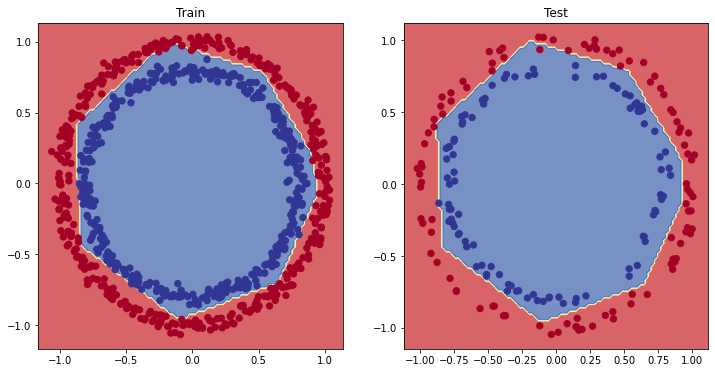

In [65]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification report( from scikit-learn)

In [66]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100): .2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9900
Model loss on the test set: 0.046286068856716156
Model accuracy on the test set:  99.00%


### How about a confusion matrix?

In [68]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: ignored

In [69]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [70]:
y_preds[:10]

array([[9.9731994e-01],
       [9.9994910e-01],
       [9.9534476e-01],
       [9.9503767e-01],
       [3.4948003e-01],
       [4.9839616e-03],
       [9.8462230e-01],
       [1.3034612e-02],
       [9.9993813e-01],
       [1.0630000e-04]], dtype=float32)

We observe the y_test is in binary form whereas y_preds is continuous.

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [71]:
# Convert our prediction probabilities to binary format and view the first 10

tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [72]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  1,  98]])

How about we prettify our confusion matrix?

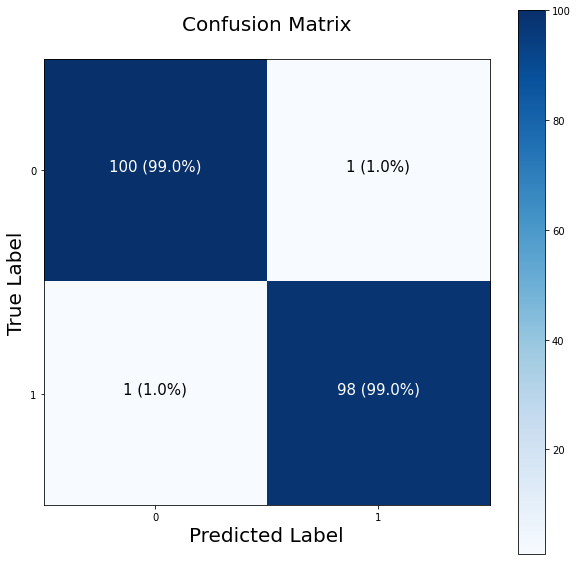

In [73]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
import itertools

figsize=(10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/ cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix", xlabel="Predicted Label", ylabel="True Label",
       xticks=np.arange(n_classes), yticks=np.arange(n_classes),
       xticklabels=labels,yticklabels=labels)

# Set x-aix labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)

## Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's know as **multi-class classification**.

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a NN to classify images of different items of clothing.

In [74]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has alrleady been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [75]:
# Show the first training example
print(f"Training sample\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

In [76]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

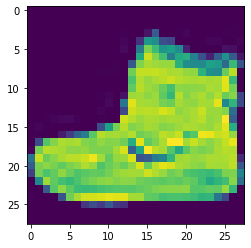

In [77]:
# PLot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [78]:
# Check out samples label
train_labels[7]

2

In [79]:
# Create a small list so we can index onto our training labels so they're human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

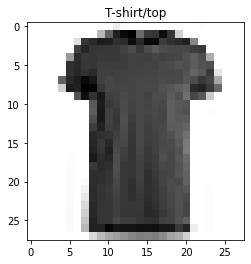

In [80]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

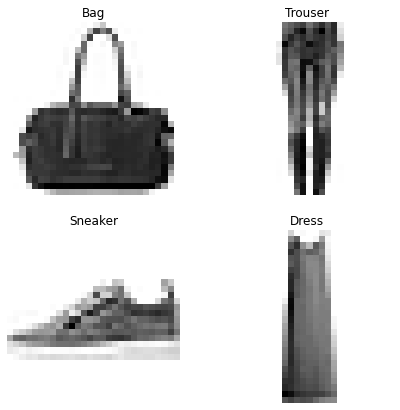

In [81]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:

* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [82]:
train_data[0].shape

(28, 28)

In [83]:
len(class_names)

10

In [84]:
#our data needs to be flattened from 28 x 28 to 784
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [85]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)), #images are 2D, need to convert to 1D
  tf.keras.layers.Dense(4, activation="relu"),                                
  tf.keras.layers.Dense(4, activation="relu"),                                
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),                               
])

# # Compile the model
# model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),  #Changed from CategoricalCrossEntropy() which expect one hot labels
#                  optimizer=tf.keras.optimizers.Adam(),
#                  metrics=["accuracy"])

# # Fit the model
# non_norm_history = model_11.fit(train_data,
#                                 train_labels,
#                                 epochs=10,
#                                 validation_data=(test_data, test_labels))

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels,depth=10)))

#note depth=10 is from 10 class_names

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1737 - accuracy: 0.1632 - val_loss: 1.8073 - val_accuracy: 0.1990
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7242 - accuracy: 0.2413 - val_loss: 1.6588 - val_accuracy: 0.3160
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6413 - accuracy: 0.2896 - val_loss: 1.6128 - val_accuracy: 0.2874
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6044 - accuracy: 0.3048 - val_loss: 1.5993 - val_accuracy: 0.3236
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5906 - accuracy: 0.3161 - val_loss: 1.5782 - val_accuracy: 0.3309
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5833 - accuracy: 0.3198 - val_loss: 1.5618 - val_accuracy: 0.3282
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5756 - accuracy: 0.3230 - val_loss: 1.5620 - val_accuracy:

In [86]:
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_28 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

NN prefer data to be scaled (or normalized), this means they like to have the numbers in the testing data between 0 & 1

In [88]:
#We can get our training and testing data between 0 & 1 by diving by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [89]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),                                                          
  tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

**Note:** NN tend to prefer data in numerical form as well as scaled/normalized form (numbers b/w 0 & 1)

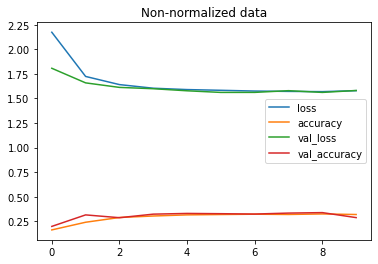

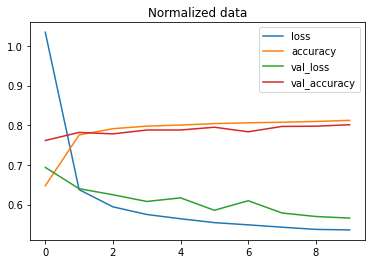

In [90]:
import pandas as pd
#plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
#Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Find the ideal learning rate

In [91]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")                                                                
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm,test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

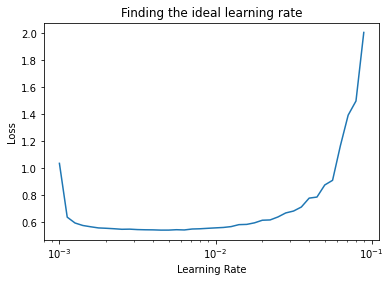

In [92]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [93]:
# let's refit a model with the ideal learning rate

tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

history_14 = model_14.fit(train_data,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1737 - accuracy: 0.1632 - val_loss: 2.3577 - val_accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7242 - accuracy: 0.2413 - val_loss: 2.7563 - val_accuracy: 0.1002
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6413 - accuracy: 0.2896 - val_loss: 2.9658 - val_accuracy: 0.1014
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6044 - accuracy: 0.3048 - val_loss: 3.0637 - val_accuracy: 0.1009
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5906 - accuracy: 0.3161 - val_loss: 2.9536 - val_accuracy: 0.1023
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5833 - accuracy: 0.3198 - val_loss: 2.8244 - val_accuracy: 0.1036
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5756 - accuracy: 0.3230 - val_loss: 2.7576 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaludate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [94]:
# Create a confusion matrix

# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
import itertools
from sklearn.metrics import confusion_matrix

figsize=(10,10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float")/ cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Create classes
  #classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix", xlabel="Predicted Label", ylabel="True Label",
       xticks=np.arange(n_classes), yticks=np.arange(n_classes),
       xticklabels=labels,yticklabels=labels)

  # Set x-aix labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)

In [95]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [96]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [97]:
#Make some predictions with our model
y_probs = model_14.predict(test_data_norm) #probs is short for prediction probabilities

# View the first 5 predictions
y_probs[:5]

array([[2.9484628e-02, 4.7295012e-02, 3.4428738e-02, 6.6439427e-02,
        3.9878473e-02, 6.3637787e-01, 3.1995680e-02, 4.5031067e-02,
        6.9030136e-02, 3.8925933e-05],
       [1.4653482e-01, 1.4467013e-01, 1.4281981e-01, 1.4236918e-01,
        1.4010219e-01, 1.8864592e-03, 1.4065611e-01, 2.5497781e-04,
        1.4069617e-01, 1.0235731e-05],
       [1.4653482e-01, 1.4467013e-01, 1.4281981e-01, 1.4236918e-01,
        1.4010219e-01, 1.8864592e-03, 1.4065611e-01, 2.5497781e-04,
        1.4069617e-01, 1.0235731e-05],
       [1.4653482e-01, 1.4467013e-01, 1.4281981e-01, 1.4236918e-01,
        1.4010219e-01, 1.8864592e-03, 1.4065611e-01, 2.5497781e-04,
        1.4069617e-01, 1.0235731e-05],
       [1.4653482e-01, 1.4467013e-01, 1.4281981e-01, 1.4236918e-01,
        1.4010219e-01, 1.8864592e-03, 1.4065611e-01, 2.5497781e-04,
        1.4069617e-01, 1.0235731e-05]], dtype=float32)

**Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [98]:
#Convert all of the pred probs into integers
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([5, 0, 0, 0, 0, 0, 0, 0, 5, 5])

In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[ 992,    3,    0,    0,    0,    0,    0,    0,    5,    0],
       [ 989,    1,    0,    0,    0,    1,    0,    0,    9,    0],
       [ 999,    0,    0,    0,    0,    1,    0,    0,    0,    0],
       [ 952,    5,    0,    0,    0,   17,    0,    0,   26,    0],
       [ 995,    0,    0,    1,    0,    1,    0,    0,    3,    0],
       [   2,    0,    0,    0,    0,  995,    0,    0,    3,    0],
       [ 998,    1,    0,    0,    0,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [ 898,    4,    0,    1,    0,   52,    0,    0,   45,    0],
       [   1,    0,    0,    0,    0,  999,    0,    0,    0,    0]])

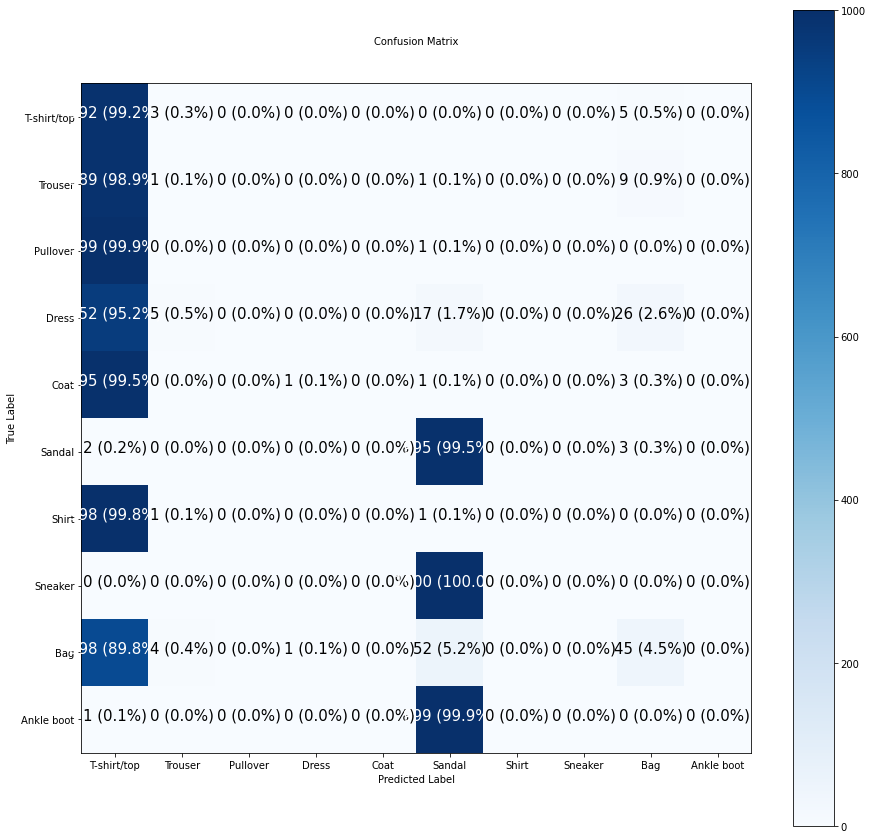

In [100]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

**Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make prediction on said image
* Label the plot with the truth label & the predicted label

In [101]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  #Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  #Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs),true_label),
             color=color) #set the color to green or red based on if prediction is right or wrong.

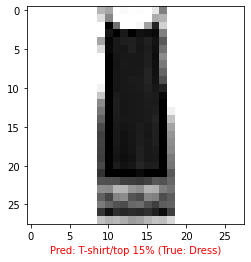

In [102]:
plot_random_image(model=model_14, images=test_data, true_labels=test_labels, classes=class_names)

#always make predictions on the same kind of data your model is trained on.

# What patterns is our model learning?

In [103]:
# Find the layers of our most recent model
model_14.layers

In [104]:
# Extract a particular layer
model_14.layers[1]

In [105]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

#Shapes
weights, weights.shape

(array([[ 0.0287192 , -0.01029544, -0.02567479, -0.00619847],
        [-0.08138508,  0.03222882,  1.028595  ,  0.06499861],
        [-0.07757453, -0.04830738,  0.9536008 ,  0.0388018 ],
        ...,
        [ 0.01556861,  0.01661945,  0.09106014, -0.02348963],
        [ 0.01095042,  0.02673633,  0.023486  , -0.07461146],
        [-0.00482979,  0.027058  , -0.02608644, -0.05812328]],
       dtype=float32), (784, 4))

In [106]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_36 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_37 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [107]:
biases, biases.shape

(array([-0.01165129, -0.03771178,  1.1176363 , -0.02597066], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [108]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_36 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_37 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


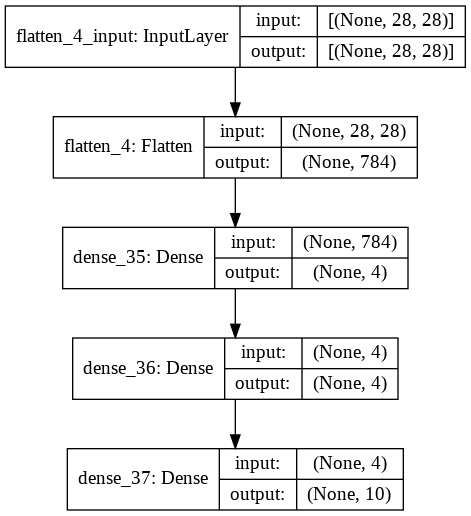

In [109]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)